# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats

# Import API key
from api_keys import ow_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"City count: {len(cities)}")

City count: 615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## OPEN WEATHER API

## Set OpenWeather API base url
ow_url = "http://api.openweathermap.org/data/2.5/weather?q="
## Set Units
units = "imperial"

## Create weather data empty list
weather_data = []
## Set initial values
record = 1

## Print Log Header
print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
        ##
        query_url = f"{ow_url}{city}&appid={ow_key}&units={units}"
        response = requests.get(query_url).json()
        try:
            ## Print Log Status
            print(f"Processing Record {record:>2d} | City Id = {response['id']:<7d} [{city}]")
            ## Retrieve weather data from OpenWeather API (response)
            weather_data.append({
                'City': response['name'],
                'Lat': response['coord']['lat'],
                'Lng': response['coord']['lon'],
                'Max Temp': response['main']['temp_max'],
                'Humidity': response['main']['humidity'],
                'Cloudiness': response['clouds']['all'],
                'Wind Speed': response['wind']['speed'],
                'Country': response['sys']['country'],
                'Date': response['dt']
            })
            ## Record counter
            record += 1
        except KeyError:
            ## Print Log Status
            print(f"City [{city}] not found. Skipping...")
            pass

## Print Log Footer
print("------------------------------")        
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record  1 | City Id = 3874787 [punta arenas]
Processing Record  2 | City Id = 2449938 [tenenkou]
Processing Record  3 | City Id = 4705086 [lamar]
Processing Record  4 | City Id = 1159362 [torbat-e jam]
Processing Record  5 | City Id = 2075265 [busselton]
Processing Record  6 | City Id = 2110227 [butaritari]
Processing Record  7 | City Id = 964432  [port alfred]
City [taolanaro] not found. Skipping...
Processing Record  8 | City Id = 2033135 [zhengjiatun]
Processing Record  9 | City Id = 5106841 [albany]
Processing Record 10 | City Id = 1498087 [nadym]
Processing Record 11 | City Id = 3466704 [castro]
Processing Record 12 | City Id = 3140056 [sauda]
Processing Record 13 | City Id = 3418910 [upernavik]
Processing Record 14 | City Id = 2065594 [mount isa]
Processing Record 15 | City Id = 3652764 [puerto ayora]
Processing Record 16 | City Id = 4020109 [atuona]
City [sentyabrskiy] not found. Skipping...
Processing Record 17 

Processing Record 145 | City Id = 1298482 [sagaing]
Processing Record 146 | City Id = 3443061 [chuy]
Processing Record 147 | City Id = 3355672 [luderitz]
Processing Record 148 | City Id = 2122389 [ossora]
City [tawkar] not found. Skipping...
Processing Record 149 | City Id = 6089245 [norman wells]
Processing Record 150 | City Id = 2121385 [severo-kurilsk]
Processing Record 151 | City Id = 3939761 [hualmay]
Processing Record 152 | City Id = 161325  [arusha]
Processing Record 153 | City Id = 2521582 [arona]
Processing Record 154 | City Id = 1279945 [jiuquan]
Processing Record 155 | City Id = 103630  [najran]
Processing Record 156 | City Id = 2641598 [newport]
Processing Record 157 | City Id = 1049261 [chimoio]
Processing Record 158 | City Id = 1816440 [bengbu]
Processing Record 159 | City Id = 2022773 [khandyga]
Processing Record 160 | City Id = 1214026 [sabang]
Processing Record 161 | City Id = 1106677 [bambous virieux]
Processing Record 162 | City Id = 553766  [kamenka]
Processing Reco

Processing Record 293 | City Id = 2236568 [uige]
Processing Record 294 | City Id = 1054035 [vohibinany]
Processing Record 295 | City Id = 2021093 [kuytun]
Processing Record 296 | City Id = 286621  [salalah]
Processing Record 297 | City Id = 2084442 [vanimo]
Processing Record 298 | City Id = 1489209 [troitskoye]
Processing Record 299 | City Id = 4566137 [manati]
Processing Record 300 | City Id = 3141667 [roald]
Processing Record 301 | City Id = 1649150 [bengkulu]
Processing Record 302 | City Id = 5710035 [west wendover]
Processing Record 303 | City Id = 1043893 [lichinga]
Processing Record 304 | City Id = 1495797 [ovsyanka]
Processing Record 305 | City Id = 3492985 [barahona]
Processing Record 306 | City Id = 3909010 [pailon]
Processing Record 307 | City Id = 1507390 [dikson]
Processing Record 308 | City Id = 1213855 [sibolga]
Processing Record 309 | City Id = 1496511 [novyy urengoy]
Processing Record 310 | City Id = 2109701 [auki]
Processing Record 311 | City Id = 1268814 [joshimath]
P

Processing Record 436 | City Id = 1856392 [muroto]
Processing Record 437 | City Id = 5329649 [blythe]
Processing Record 438 | City Id = 3664980 [boa vista]
Processing Record 439 | City Id = 1529660 [aksu]
Processing Record 440 | City Id = 1863997 [fukue]
Processing Record 441 | City Id = 2137773 [vao]
Processing Record 442 | City Id = 2016307 [solnechnyy]
Processing Record 443 | City Id = 2641434 [northam]
Processing Record 444 | City Id = 2030065 [mandalgovi]
City [yomitan] not found. Skipping...
Processing Record 445 | City Id = 2122104 [petropavlovsk-kamchatskiy]
Processing Record 446 | City Id = 1498283 [mugur-aksy]
Processing Record 447 | City Id = 4734350 [stephenville]
Processing Record 448 | City Id = 3647637 [cabudare]
Processing Record 449 | City Id = 2022064 [kirovskiy]
Processing Record 450 | City Id = 2161515 [kiama]
Processing Record 451 | City Id = 2018735 [nyurba]
Processing Record 452 | City Id = 3140301 [sandnessjoen]
Processing Record 453 | City Id = 3374120 [vila do

In [4]:
# Print the city count to confirm updated count
print(f"Updated city count: {len(weather_data)}")

Updated city count: 562


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
## Build DataFrame
raw_city_data = pd.DataFrame(data = weather_data)

## Export DataFrame (of all retrieved data) to CSV
raw_city_data.to_csv('Output/Cities.csv', index=False, header=True, encoding='utf-8')

## Display DataFrame
raw_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.80,75,0,6.91,CL,1619720720
1,Ténenkou,14.4572,-4.9169,103.69,17,76,13.04,ML,1619720952
2,Lamar,33.6668,-95.5836,73.40,78,90,6.96,US,1619720952
3,Torbat-e Jām,35.2440,60.6225,73.08,39,93,14.85,IR,1619720953
4,Busselton,-33.6500,115.3333,50.00,98,86,14.18,AU,1619720747


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
## Inspect data to check max humidity is equal or less than 100%
raw_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.126556,17.763612,61.844431,68.425267,55.599644,7.609840,1.619721e+09
std,33.856100,91.175840,20.344376,24.402498,39.046910,4.873683,9.276758e+01
min,-54.800000,-179.166700,-1.710000,1.000000,0.000000,0.270000,1.619721e+09
25%,-8.886850,-64.095775,47.242500,54.000000,18.250000,3.835000,1.619721e+09
50%,25.322000,22.914700,66.120000,74.000000,72.500000,6.910000,1.619721e+09
75%,50.175100,95.815125,78.010000,88.000000,94.000000,10.360000,1.619721e+09
max,78.218600,179.316700,104.000000,100.000000,100.000000,29.950000,1.619721e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
outlier_index = raw_city_data.loc[raw_city_data['Humidity']>100].index
print(f"Number of cities with humidity over 100%: {len(outlier_index)}")
print(f"Indices: {outlier_index}")

Number of cities with humidity over 100%: 0
Indices: Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_city_data.drop(index=outlier_index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.80,75,0,6.91,CL,1619720720
1,Ténenkou,14.4572,-4.9169,103.69,17,76,13.04,ML,1619720952
2,Lamar,33.6668,-95.5836,73.40,78,90,6.96,US,1619720952
3,Torbat-e Jām,35.2440,60.6225,73.08,39,93,14.85,IR,1619720953
4,Busselton,-33.6500,115.3333,50.00,98,86,14.18,AU,1619720747


In [9]:
## Inspect data to check max humidity is equal or less than 100%
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.126556,17.763612,61.844431,68.425267,55.599644,7.609840,1.619721e+09
std,33.856100,91.175840,20.344376,24.402498,39.046910,4.873683,9.276758e+01
min,-54.800000,-179.166700,-1.710000,1.000000,0.000000,0.270000,1.619721e+09
25%,-8.886850,-64.095775,47.242500,54.000000,18.250000,3.835000,1.619721e+09
50%,25.322000,22.914700,66.120000,74.000000,72.500000,6.910000,1.619721e+09
75%,50.175100,95.815125,78.010000,88.000000,94.000000,10.360000,1.619721e+09
max,78.218600,179.316700,104.000000,100.000000,100.000000,29.950000,1.619721e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
## SET PARAMETERS

## Date of analysis: Get current time and covert date to string (mm/dd/yyyy)
date = time.strftime('%m-%d-%Y')

## Set initial values
figure_num = 1

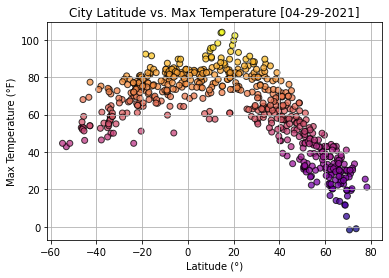

In [11]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='royalblue', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## Show grid
plt.grid()
# Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Humidity Plot

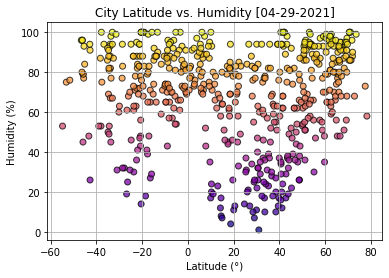

In [12]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='orange', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Humidity [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Cloudiness Plot

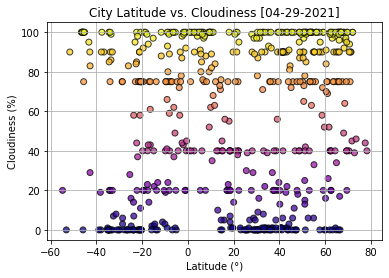

In [13]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='purple', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Cloudiness [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Wind Speed Plot

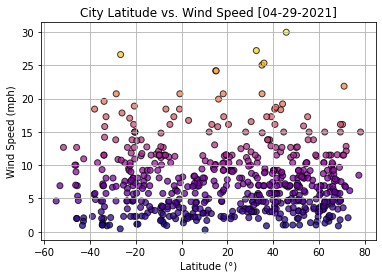

In [14]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='green', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Wind Speed [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Linear Regression

In [15]:
## SEPARATE NORTHERN & SOUTHERN HEMISPHERES (get .loc booleans)

## Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemisphere = clean_city_data["Lat"] >= 0
## Southern Hemisphere (less than 0 degrees latitude)
south_hemisphere = clean_city_data["Lat"] < 0

In [16]:
## LATITUDE LINEAR REGRESSION AS A FUNCTION

## Define Linear Regression using Latitude as independent variable
## using hemisphere and dependent variable as arguments
def latitude_regression (hemisphere, variable, y_label, figure_num):

    ## Set initial values for Northern Hemisphere
    if hemisphere == 'North':
        x_values = clean_city_data['Lat'].loc[north_hemisphere]
        y_values = clean_city_data[variable].loc[north_hemisphere]
        x_label = "Northern Hemisphere Latitude (°)"
        color='royalblue'
        alpha=0.3
            
    ## Set initial values for Southern Hemisphere
    elif hemisphere == 'South':
        x_values = clean_city_data['Lat'].loc[south_hemisphere]
        y_values = clean_city_data[variable].loc[south_hemisphere]
        x_label = "Southern Hemisphere Latitude (°)"
        color = 'yellow'
        alpha=0.4
        
    ## LINEAR REGRESSION
    ## Compute Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    ## Set regression line parameters (x0-x1)
    regress_line_x = (min(x_values), max(x_values))
    ## Set regression line parameters (y0-y1)
    regress_line_y = [min(x_values) * slope + intercept, max(x_values) * slope + intercept]
    # Set regresion line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## SCATTER PLOT
    ## Set Scatter Plot parameters
    plt.scatter(x_values, y_values, color=color, alpha=alpha, edgecolors= "black")

    # Set Title, X Label, and Y Label
    plt.title(f"City Latitude vs. {variable} [{date}]")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    ## REGRESSION LINE PLOT
    ## Set Line Plot parameters
    plt.plot(regress_line_x, regress_line_y, linestyle=(0, (5, 1)), color='darkred', alpha=1, linewidth=2.5)
    ## Annotate regression line equation
    x_annotate = (max(x_values)-min(x_values))*0.1 + min(x_values)
    y_annotate = (max(y_values)-min(y_values))*0.05 + min(y_values)
    plt.annotate(f"{line_eq}\n", (x_annotate, y_annotate), fontsize=15, color='darkred')
    plt.annotate(f"r-squared: {rvalue**2:.2%}", (x_annotate, y_annotate), fontsize=12, color='darkred')
    
    ## Save plot
    plt.savefig(f"Output/Fig_{figure_num:02d}.png")
    figure_num += 1
    
    ## Show plot
    plt.show()
    
    ## Display Regression R^2 & Pearson Correlation
    ## Print r-value
    print(f"The linear reggression coefficient of detemination (r-squared) is: {rvalue**2:.2f}")
    ## Print r-squared
    print(f"The correlation coefficient (r-value) is: {round(stats.pearsonr(x_values, y_values)[0],2)}")
    
    return figure_num

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

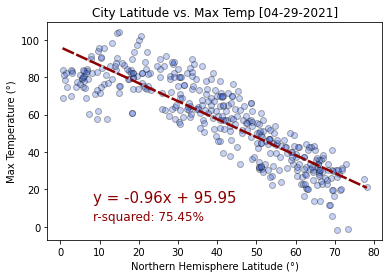

The linear reggression coefficient of detemination (r-squared) is: 0.75
The correlation coefficient (r-value) is: -0.87


In [17]:
figure_num = latitude_regression('North', 'Max Temp', 'Max Temperature (°)', figure_num)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

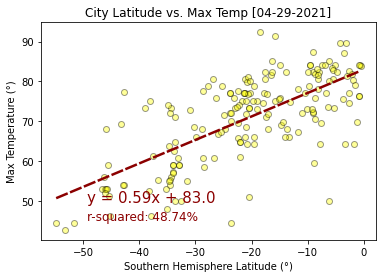

The linear reggression coefficient of detemination (r-squared) is: 0.49
The correlation coefficient (r-value) is: 0.7


In [18]:
figure_num = latitude_regression('South', 'Max Temp', 'Max Temperature (°)', figure_num)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

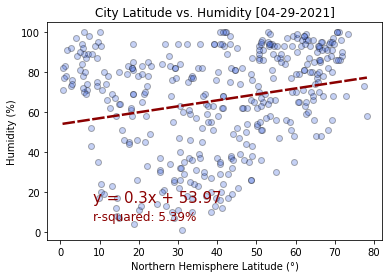

The linear reggression coefficient of detemination (r-squared) is: 0.05
The correlation coefficient (r-value) is: 0.23


In [19]:
figure_num = latitude_regression('North', 'Humidity', 'Humidity (%)', figure_num)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

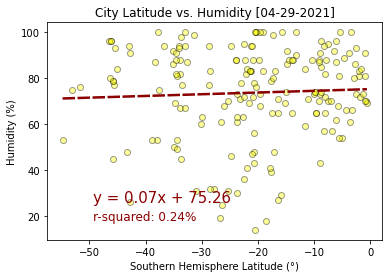

The linear reggression coefficient of detemination (r-squared) is: 0.00
The correlation coefficient (r-value) is: 0.05


In [20]:
figure_num = latitude_regression('South', 'Humidity', 'Humidity (%)', figure_num)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

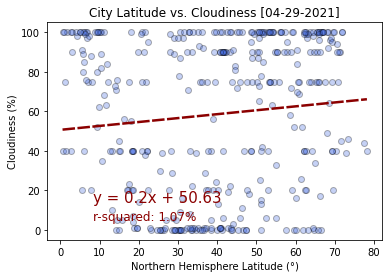

The linear reggression coefficient of detemination (r-squared) is: 0.01
The correlation coefficient (r-value) is: 0.1


In [21]:
figure_num = latitude_regression('North', 'Cloudiness', 'Cloudiness (%)', figure_num)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

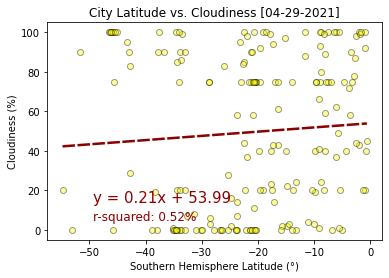

The linear reggression coefficient of detemination (r-squared) is: 0.01
The correlation coefficient (r-value) is: 0.07


In [22]:
figure_num = latitude_regression('South', 'Cloudiness', 'Cloudiness (%)', figure_num)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

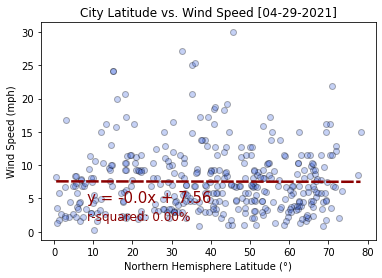

The linear reggression coefficient of detemination (r-squared) is: 0.00
The correlation coefficient (r-value) is: -0.0


In [23]:
figure_num = latitude_regression('North', 'Wind Speed', 'Wind Speed (mph)', figure_num)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

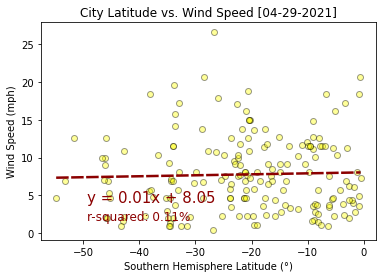

The linear reggression coefficient of detemination (r-squared) is: 0.00
The correlation coefficient (r-value) is: 0.03


In [24]:
figure_num = latitude_regression('South', 'Wind Speed', 'Wind Speed (mph)', figure_num)